In [79]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
grid_size = 50
states = {'V': 0, 'H': 1, 'I': 2, 'C': 3}  # V: vacant, H: housing, I: industrial, C: commercial
growth_rates = {1: 0.003, 2: 0.001, 3: 0.0014}  
num_iterations = 30  # Number of iterations

# Initialize the grid and counts
grid = np.zeros((grid_size, grid_size), dtype=int)
counts = {0: grid_size * grid_size, 1: 0, 2: 0, 3: 0}

def initial_land_use(seed_number, grid_size, plot=True):
    np.random.seed(seed_number)
    
    global grid  # Make sure we're modifying the global grid variable

    # Define initial conditions
    center_x, center_y = grid_size // 2, grid_size // 2
    commercial_cells = [(center_x, center_y), (center_x - 1, center_y), (center_x, center_y + 1)]
    residential_cells = []
    num_residential = 20
    min_dist = 3  # Minimum distance from commercial cells

    industrial_cells = []
    num_industrial = 4
    min_dist_industrial = 3  # Minimum distance from commercial cells

    # Generate random residential cells around the commercial area
    while len(residential_cells) < num_residential:
        x = np.random.randint(center_x - min_dist, center_x + min_dist + 1)
        y = np.random.randint(center_y - min_dist, center_y + min_dist + 1)
        if (x, y) not in commercial_cells:
            residential_cells.append((x, y))

    # Generate random industrial cells around the commercial area
    while len(industrial_cells) < num_industrial:
        x = np.random.randint(center_x - min_dist_industrial, center_x + min_dist_industrial + 1)
        y = np.random.randint(center_y - min_dist_industrial, center_y + min_dist_industrial + 1)
        if (x, y) not in commercial_cells:
            industrial_cells.append((x, y))

    # Assign initial land use types
    for x, y in commercial_cells:
        grid[x, y] = states['C']  # Commercial
    for x, y in residential_cells:
        grid[x, y] = states['H']  # Residential
    for x, y in industrial_cells:
        grid[x, y] = states['I']  # Industrial

    if plot:
        # Set the figure size
        plt.figure(figsize=(8, 8))
        cmap = plt.cm.colors.ListedColormap(['white', 'skyblue', 'grey', 'orange'])
        plt.imshow(grid, cmap=cmap, origin='lower', vmin=0, vmax=3)
        plt.colorbar(ticks=[0, 1, 2, 3], label='Land Use')
        plt.title('Initial Land Use')
        plt.show()

    return grid

# Function to set the Hierarchy of Land-use States
def get_key(val):
    for key, value in states.items():
        if val == value:
            return key

def convert_bool(current_state, new_state):
    current_state = get_key(current_state)
    new_state = get_key(new_state)
    return states[new_state] > states[current_state]

def convert_cells(state):
    # Calculate the number of cells to convert
    num_to_convert = int(grid_size * grid_size * growth_rates[state])

    converted = 0
    for _ in range(num_to_convert):
        i, j = np.random.randint(grid_size, size=2)
        # here we pass two separate arguments instead of a single tuple
        if grid[i][j] == states['V'] and convert_bool(grid[i][j], state):
            grid[i][j] = state  # Convert to the new state
            counts[states['V']] -= 1
            counts[state] += 1
            converted += 1
            if converted == num_to_convert:
                return





In [81]:
weights_table = {
    'Vacant_Commerce': {
        'C': [25, 25, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        'I': [0]*18,
        'H': [4, 3.5, 3, 2.5, 2, 2, 2, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1],
        'V': [0]*18
    },
    'Vacant_Industry': {
        'C': [0]*18,
        'I': [3, 3, 2, 1, 0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        'H': [-1, -1, 0] + [0]*15,
        'V': [0]*18
    },
    'Vacant_Housing': {
        'C': [-2, -1, 2, 1, 1, 1, 0.5, 0.5, 0.4, 0.3, 0.2, 0.1, 0.1, 0.1, 0, 0, 0, 0],
        'I': [-10, -10, -5, -3, -1] + [0]*13,
        'H': [2, 2, 1.5, 1.5, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
        'V': [0]*18
    },
    'Industry_Commerce': {
        'C': [25, 25, 25, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
        'I': [-2, -2, -2] + [0]*15,
        'H': [4, 3.5, 3, 2.5, 2, 2, 2, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1],
        'V': [0]*18
    },
    'Industry_Industry': {
        'C': [0]*18,
        'I': [0]*18,
        'H': [0]*18,
        'V': [0]*18
    },
    'Industry_Housing': {
        'C': [0]*18,
        'I': [0]*18,
        'H': [0]*18,
        'V': [0]*18
    },
    'Housing_Commerce': {
        'C': [25, 25, 25, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
        'I': [-10, -10, -5, -3, -1] + [0]*13,
        'H': [4, 3.5, 3, 2.5, 2, 2, 2, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1],
        'V': [0]*18
    },
    'Housing_Industry': {
        'C': [0]*18,
        'I': [3, 3, 2, 1, 0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        'H': [-1, -1, 0] + [0]*15,
        'V': [0]*18
    },
    'Housing_Housing': {
        'C': [0]*18,
        'I': [0]*18,
        'H': [0]*18,
        'V': [0]*18
    },
}

# Test of accessing a weight:
transition = 'Vacant_Commerce'
cell_type = 'H'
distance_zone = 1
# This is distance zone is from 0 to 17
weight = weights_table[transition][cell_type][distance_zone]
print(f"The weight for transition={transition}, cell_type={cell_type}, distance_zone={distance_zone} is {weight}")


The weight for transition=Vacant_Commerce, cell_type=H, distance_zone=1 is 3.5


In [82]:

def get_distance_zone(distance):
    zone_mapping = {0: 1, 1: 1.4, 2: 2, 3: 2.2, 4: 2.8, 5: 3, 6: 3.2, 7: 3.6, 8: 4, 9: 4.1, 10: 4.2, 11: 4.5, 12: 5, 13: 5.1, 14: 5.4, 15: 5.7, 16: 5.8, 17: 6}
    for zone, max_distance in reversed(list(zone_mapping.items())):
        if distance >= max_distance:
            return zone
    return 0  # Return 0 if distance is less than the minimum specified distance

def get_neighbourhood(grid, row, col, radius):
    rows, cols = grid.shape
    square_row_range = range(max(0, row - radius), min(rows, row + radius + 1))
    square_col_range = range(max(0, col - radius), min(cols, col + radius + 1))
    square_neighbourhood = grid[np.ix_(square_row_range, square_col_range)]
    circle_mask = np.zeros_like(square_neighbourhood, dtype=bool)
    distance_zones = np.zeros_like(square_neighbourhood, dtype=int)
    # Adjusted center coordinates inside the neighbourhood
    center = min(row, radius), min(col, radius)
    for i in range(square_neighbourhood.shape[0]):
        for j in range(square_neighbourhood.shape[1]):
            distance = np.sqrt((center[0] - i) ** 2 + (center[1] - j) ** 2)
            if distance <= radius:
                circle_mask[i, j] = True
                distance_zones[i, j] = get_distance_zone(distance)
    circle_mask[center] = False  # Exclude the center cell
    return square_neighbourhood[circle_mask], distance_zones[circle_mask]




def cell_type_to_states(state):
    if state == 'Vacant':
        return 0
    elif state == 'Housing':
        return 1
    elif state == 'Industry':
        return 2
    elif state == 'Commerce':
        return 3

def states_to_cell_type(state):
    if state == 0:
        return 'V'
    elif state == 1:
        return 'H'
    elif state == 2:
        return 'I'
    elif state == 3:
        return 'C'


def calculate_transition_potentials(grid, alpha, weights_table, radius):
    transition_potentials = np.zeros((grid.shape[0], grid.shape[1], 4))  # 4 possible states
    transitions = ['Vacant_Commerce', 'Vacant_Industry', 'Vacant_Housing', 'Industry_Commerce', 'Industry_Industry',
                   'Industry_Housing', 'Housing_Commerce', 'Housing_Industry', 'Housing_Housing']
    
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            neighbourhood, distance_zones = get_neighbourhood(grid, i, j, radius)
            for transition in transitions:
                # Extract the current state and desired state from the transition string
                current_state, desired_state = transition.split('_')
                
                current_state_num = cell_type_to_states(current_state)
                desired_state_num = cell_type_to_states(desired_state)
                
            
                if grid[i, j] == current_state_num:
                    sum_weights = 0
                    for neighbor_state, distance_zone in zip(neighbourhood, distance_zones):
                        
                        neighbor_type = states_to_cell_type(neighbor_state)
                        
                        m_kd = weights_table[transition][neighbor_type][distance_zone]

                        if neighbor_state == desired_state_num:
                            sum_weights += m_kd

                    
                    R = random.uniform(0, 1)
                    S = 1 + (-math.log(R))**alpha
                    transition_potentials[i, j, desired_state_num] = S * (1 + sum_weights)
    return transition_potentials







In [83]:
test_grid = np.array([
    [3, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 2, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
])


alpha = 1

transition_potentials_test = calculate_transition_potentials(test_grid, alpha, weights_table, 2)
print("Transition Potentials:")
print(transition_potentials_test)




Transition Potentials:
[[[ 0.          0.          0.          0.        ]
  [ 0.          8.69927976  1.00259819 50.99890798]
  [ 0.         10.65181526  3.5140263  27.58018213]
  [ 0.          9.2090292   2.08315746  1.46783322]
  [ 0.          6.54245082  1.18797536  1.49136315]]

 [[ 0.          6.98716808  1.51740536 53.28451509]
  [ 0.          3.33225262  5.39894069 48.16058504]
  [ 0.          1.619664    7.04988132  1.90048155]
  [ 0.          3.15187101  7.34969842  1.19641749]
  [ 0.          9.71403642  3.69960093  1.88674084]]

 [[ 0.         13.74315003 10.13057939 53.55849255]
  [ 0.          1.43318351 11.40065334  1.04908027]
  [ 0.          2.36361683  2.13040992  1.03791541]
  [ 0.          1.00945188  9.44414977  1.00120988]
  [ 0.         12.48875345  4.21450323  1.07105332]]

 [[ 0.         12.84795169  1.25415232  1.42436756]
  [ 0.          1.17134117  6.06730228  1.9932746 ]
  [ 0.          2.11835131  5.17793679  2.50653524]
  [ 0.          1.09186747  9.43955

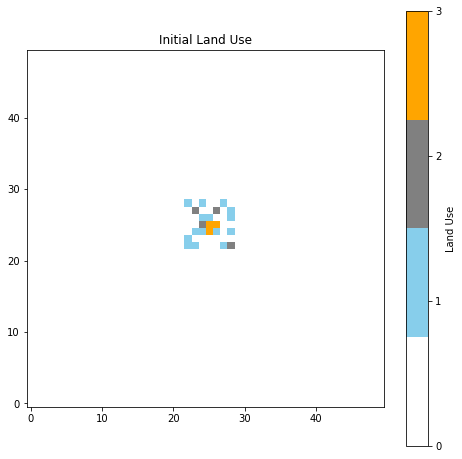

Initial counts: {0: 2478, 1: 15, 2: 4, 3: 3}
Running iteration 1...
Counts at iteration 1: {0: 2459, 1: 27, 2: 9, 3: 5}
Running iteration 2...
Counts at iteration 2: {0: 2440, 1: 39, 2: 14, 3: 7}
Running iteration 3...
Counts at iteration 3: {0: 2421, 1: 51, 2: 19, 3: 9}
Running iteration 4...
Counts at iteration 4: {0: 2402, 1: 63, 2: 24, 3: 11}
Running iteration 5...
Counts at iteration 5: {0: 2383, 1: 75, 2: 29, 3: 13}
Running iteration 6...
Counts at iteration 6: {0: 2364, 1: 87, 2: 34, 3: 15}
Running iteration 7...
Counts at iteration 7: {0: 2345, 1: 99, 2: 39, 3: 17}
Running iteration 8...
Counts at iteration 8: {0: 2326, 1: 111, 2: 44, 3: 19}
Running iteration 9...
Counts at iteration 9: {0: 2307, 1: 123, 2: 49, 3: 21}
Running iteration 10...
Counts at iteration 10: {0: 2288, 1: 135, 2: 54, 3: 23}
Running iteration 11...
Counts at iteration 11: {0: 2269, 1: 147, 2: 59, 3: 25}
Running iteration 12...
Counts at iteration 12: {0: 2250, 1: 159, 2: 64, 3: 27}
Running iteration 13...


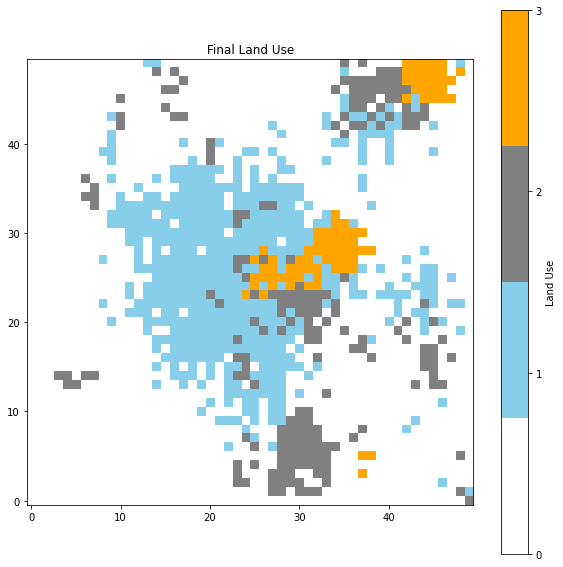

In [84]:
def run_simulation(grid, weights_table, alpha, growth_rates, radius, seed, num_iterations):
    np.random.seed(seed)
    
    grid_size = grid.shape[0]
    
    # We will start with the assumption that all cells are vacant.
    initial_land_use(seed_number=seed, grid_size=grid_size, plot=True)

    # Reset the counts and count the initial number of cells in each state
    counts = {0: 0, 1: 0, 2: 0, 3: 0}
    for i in range(grid_size):
        for j in range(grid_size):
            counts[grid[i, j]] += 1

    print(f"Initial counts: {counts}")
    
    for iteration in range(num_iterations):  # Run for num_iterations iterations
        print(f"Running iteration {iteration+1}...")
        

        # Calculate transition potentials
        transition_potentials = calculate_transition_potentials(grid, alpha,weights_table, radius)
        
        for new_state in [states['H'], states['I'], states['C']]:  # For each type of land use
            # Calculate the number of cells to convert
            num_to_convert = int(grid_size * grid_size * growth_rates[new_state])

            # Sort the cells in order of decreasing transition potential for the new state
            potential_cells = sorted(
                ((i, j) for i in range(grid_size) for j in range(grid_size) if grid[i, j] == states['V']),
                key=lambda cell: transition_potentials[cell + (new_state,)],
                reverse=True
            )
            
            # Convert the required number of cells
            for cell in potential_cells[:num_to_convert]:
                grid[cell] = new_state
                counts[states['V']] -= 1
                counts[new_state] += 1

        print(f"Counts at iteration {iteration+1}: {counts}")

    # Visualize the final state
    plt.figure(figsize=(10, 10))
    cmap = plt.cm.colors.ListedColormap(['white', 'skyblue', 'grey', 'orange'])
    plt.imshow(grid, cmap=cmap, origin='lower', vmin=0, vmax=3)
    plt.colorbar(ticks=[0, 1, 2, 3], label='Land Use')
    plt.title('Final Land Use')
    plt.show()
    
# Define the exogenous growth rates
growth_rates = {
    states['H']: 0.005,  # Replace with your actual growth rates
    states['I']: 0.002,
    states['C']: 0.0009,
}

num_iterations = 40
# Run the simulation
run_simulation(grid, weights_table, alpha=2.5, growth_rates=growth_rates, radius = 6, seed=4, num_iterations=num_iterations)
